<a href="https://colab.research.google.com/github/AniketJoshi111/Dsbda_codes/blob/main/assign2_dsbda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(rc = {"figure.figsize" : (5,3)})

In [3]:
df = pd.read_csv("dataset.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df  = df.rename(columns={
    "race/ethnicity" : "race",
    "parental level of education" :"parent_edu",
    "test_preparation_course" : "course_completed",
    "math score":"score_math",
    "reading score":"score_reading",
    "writing score":"score_writing"
})

df.head()

,gender,race,parent_edu,lunch,test preparation course,score_math,score_reading,score_writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.dtypes

,0
gender,object
race,object
parent_edu,object
lunch,object
test preparation course,object
score_math,int64
score_reading,int64
score_writing,int64


In [12]:
df.isna().sum()

,0
gender,0
race,0
parent_edu,0
lunch,0
test preparation course,0
score_math,0
score_reading,0
score_writing,0


<Axes: xlabel='score_math', ylabel='Count'>

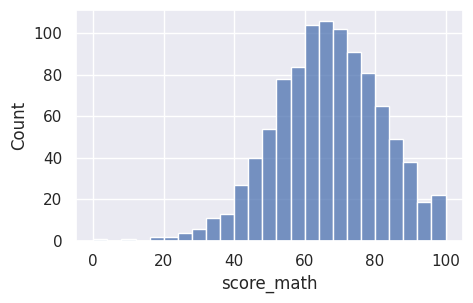

In [13]:
sns.histplot(df.score_math)

<Axes: xlabel='score_reading', ylabel='Count'>

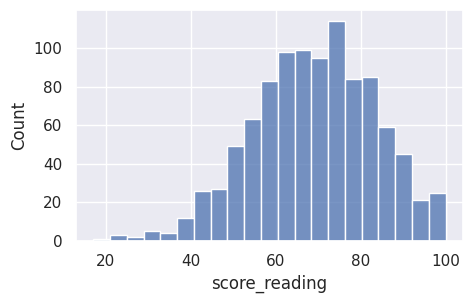

In [14]:
sns.histplot(df.score_reading)

<Axes: xlabel='score_writing', ylabel='Count'>

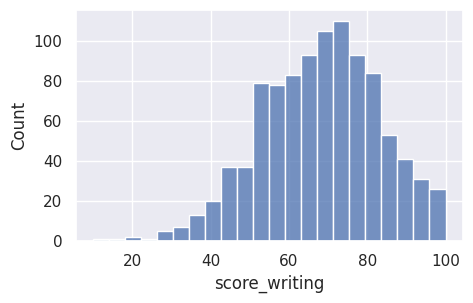

In [15]:
sns.histplot(df.score_writing)


In [17]:
def remove_outliers(feature):
  global df
  q3 , q1 = np.percentile(df[feature] , [75,25])
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr

  df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]



In [18]:
remove_outliers("score_writing")
remove_outliers("score_reading")
remove_outliers("score_math")

<Axes: xlabel='score_math', ylabel='Count'>

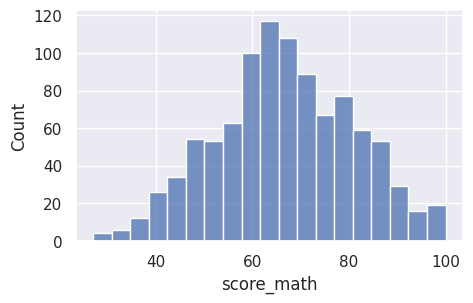

In [19]:
sns.histplot(df.score_math)

<Axes: xlabel='score_reading', ylabel='Count'>

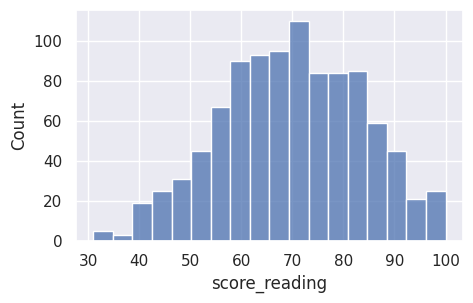

In [20]:
sns.histplot(df.score_reading)

<Axes: xlabel='score_writing', ylabel='Count'>

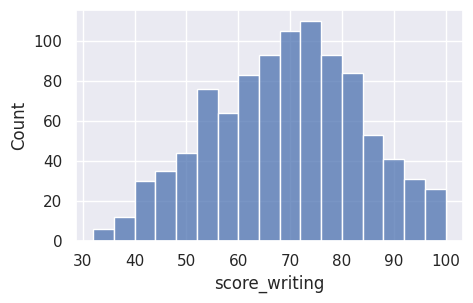

In [21]:
sns.histplot(df.score_writing)

# Data Transformation

In [27]:
def encode_categorical(feature):
  values = df[feature].unique()
  label = 0

  for val in values:
    df.loc[df[feature] == val , feature] = label
    label +=1

encode_categorical( "gender" )
encode_categorical( "race" )
encode_categorical( "parent_edu" )
encode_categorical( "lunch" )
encode_categorical( "test preparation course" )


In [30]:
df.race.value_counts()

,count
race,
1,315
3,261
0,183
4,139
2,88


In [31]:
df.parent_edu.value_counts()

,count
parent_edu,
1,222
3,221
4,191
5,175
0,118
2,59


In [32]:
df.lunch.value_counts()

,count
lunch,
0,642
1,344


In [28]:
def z_score(feature):
  df[feature] = (df[feature] - df[feature].mean())/df[feature].std()


def min_max(feature):
  df[feature] = (df[feature] - df[feature].min())/(df[feature].max() - df[feature].min())



z_score("score_math")
z_score("score_reading")
z_score("score_writing")

# Z-Score Normalization is used in this assignment

z-score :
ds[feature] = ( ds[feature] - ds[feature].mean() ) / ds[feature].std()

min-max :
df[feature] = (df[feature] - df[feature].min())/(df[feature].max() - df
[feature].min())

<Axes: xlabel='score_writing', ylabel='Count'>

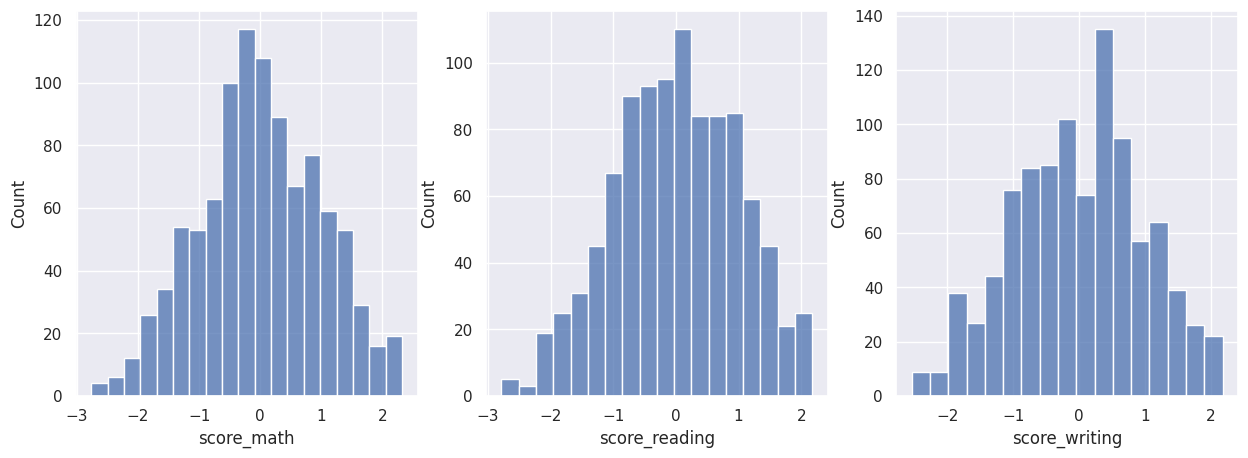

In [38]:
fig , axes = plt.subplots(1,3,figsize=(15,5))

sns.histplot(data=df["score_math"] , ax=axes[0])
sns.histplot(data=df["score_reading"] , ax=axes[1])
sns.histplot(data=df["score_writing"] , ax=axes[2])
